In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline

## load data

In [3]:
df = pd.read_csv('../data/X.csv')

In [12]:
numeric_columns = ['min', 'max', 'mean', 'sd', 'range',
       'sum','duplicates', 'mra_D1_min', 'mra_D1_max', 'mra_D1_mean', 'mra_D1_sd',
       'mra_D1_range', 'mra_D1_zero', 'mra_D2_min', 'mra_D2_max',
       'mra_D2_mean', 'mra_D2_sd', 'mra_D2_range', 'mra_D2_zero', 'mra_D3_min',
       'mra_D3_max', 'mra_D3_mean', 'mra_D3_sd', 'mra_D3_range', 'mra_D3_zero',
       'tri_min', 'tri_max', 'tri_mean', 'tri_sd', 'tri_range', 'var_sill',
       'var_range', 'var_kappa', 'g', 'zeros', 'num_peaks', 'gradient_max',
       'gradient_min', 'gradient_mean', 'gradient_stdev']

## scale data

In [13]:
df_scaled = pd.concat([df[['image_id', 'classification']], pd.DataFrame(StandardScaler().fit_transform(df[numeric_columns]), columns=numeric_columns)])

In [14]:
df_scaled = pd.concat([
    df[['image_id', 'classification']],
    pd.DataFrame(StandardScaler().fit_transform(df[numeric_columns]), columns=numeric_columns)
], axis=1)

In [15]:
df_scaled

,image_id,classification,min,max,mean,sd,range,sum,duplicates,mra_D1_min,...,var_sill,var_range,var_kappa,g,zeros,num_peaks,gradient_max,gradient_min,gradient_mean,gradient_stdev
0,1,high,-0.204857,-0.249751,-0.221113,-0.236633,-0.233770,-0.221113,1.345366,0.219985,...,-0.034204,-0.042722,-0.516985,1.661494,-0.395578,0.232137,-0.235846,0.0,-0.256257,-0.234798
1,2,high,-0.204857,-0.249751,-0.221113,-0.236633,-0.233770,-0.221113,1.405469,0.219985,...,-0.034204,-0.043209,-0.427503,1.631224,-0.395578,0.232137,-0.235846,0.0,-0.256257,-0.234798
2,3,high,-0.204857,-0.249751,-0.221113,-0.236633,-0.233770,-0.221113,1.385434,0.219985,...,-0.034204,-0.043363,-0.427503,1.633066,-0.395578,0.232137,-0.235846,0.0,-0.256257,-0.234798
3,4,high,-0.204857,-0.249751,-0.221113,-0.236633,-0.233770,-0.221113,1.275246,0.219985,...,-0.034204,-0.043552,-0.785430,1.583197,-0.395578,0.232137,-0.235846,0.0,-0.256257,-0.234798
4,5,high,-0.204857,-0.249751,-0.221113,-0.236633,-0.233770,-0.221113,1.395452,0.219985,...,-0.034204,-0.043558,-0.785430,1.626104,-0.395578,0.232137,-0.235846,0.0,-0.256257,-0.234798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,low,-0.190702,-0.234553,-0.206966,-0.223256,-0.222280,-0.206966,-0.537860,0.212401,...,-0.034204,-0.042569,0.109387,-1.130110,-0.395578,0.202876,-0.221778,0.0,-0.244950,-0.225152
976,977,low,-0.190876,-0.234753,-0.206986,-0.223347,-0.222450,-0.206986,-0.597963,0.211591,...,-0.034204,-0.042511,0.019905,-1.131107,-0.395578,0.204917,-0.221789,0.0,-0.244897,-0.225168
977,978,low,-0.190936,-0.234999,-0.207009,-0.223476,-0.222910,-0.207009,-0.748220,0.212053,...,-0.034204,-0.042581,0.019905,-1.132089,-0.395578,0.204237,-0.221799,0.0,-0.244812,-0.225181
978,979,low,-0.190667,-0.234343,-0.206978,-0.223636,-0.221862,-0.206978,-0.537860,0.211638,...,-0.034204,-0.042475,0.019905,-1.133728,-0.395578,0.200834,-0.221806,0.0,-0.244873,-0.225172


## define transformations

In [ ]:
transformations = {
    'log': np.log,
    '1x': lambda x: 1/x,
    'x2': lambda x: np.power(x, 2),
    'sqrt': np.sqrt
}

## descriptive features

In [ ]:
g = sns.pairplot(vars=['min', 'max', 'mean'], data=df_scaled, hue='classification')
# g.fig.suptitle('Descriptive Features', y=1.01)
g.fig.savefig('../images/descriptive_features_1_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['sd', 'range', 'sum'], data=df_scaled, hue='classification')
# g.fig.suptitle('Descriptive Features', y=1.01)
g.fig.savefig('../images/descriptive_features_2_pairplot.png')

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(15, 5))
sns.boxplot(x="classification", y='min', data=df_scaled, ax=axs[0, 0])
sns.boxplot(x="classification", y='max', data=df_scaled, ax=axs[0, 1])
sns.boxplot(x="classification", y='mean', data=df_scaled, ax=axs[0, 2])
sns.boxplot(x="classification", y='sd', data=df_scaled, ax=axs[1, 0])
sns.boxplot(x="classification", y='range', data=df_scaled, ax=axs[1, 1])
sns.boxplot(x="classification", y='sum', data=df_scaled, ax=axs[1, 3])
sns.boxplot(x="classification", y='duplicates', data=df_scaled, ax=axs[1, 2])
plt.tight_layout()
fig.savefig('../images/descriptive_features_boxplots.png')

## wavelet features

In [ ]:
g = sns.pairplot(vars=['mra_D1_min', 'mra_D1_max', 'mra_D1_mean', 'mra_D1_sd', 'mra_D1_range', 'mra_D1_zero'], data=df_scaled, hue='classification')
# g.fig.suptitle('Wavelet Features (D1)', y=1.01)
g.fig.savefig('../images/mra_features_d1_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['mra_D2_min', 'mra_D2_max', 'mra_D2_mean', 'mra_D2_sd', 'mra_D2_range', 'mra_D2_zero'], data=df_scaled, hue='classification')
# g.fig.suptitle('Wavelet Features (D2)', y=1.01)
g.fig.savefig('../images/mra_features_d2_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['mra_D3_min', 'mra_D3_max', 'mra_D3_mean', 'mra_D3_sd', 'mra_D3_range', 'mra_D3_zero'], data=df_scaled, hue='classification')
# g.fig.suptitle('Wavelet Features (D3)', y=1.01)
g.fig.savefig('../images/mra_features_d3_pairplot.png')

In [ ]:
fig, axs = plt.subplots(3, 6, figsize=(20, 8))
sns.boxplot(x="classification", y='mra_D1_min', data=df_scaled, ax=axs[0, 0])
sns.boxplot(x="classification", y='mra_D1_max', data=df_scaled, ax=axs[0, 1])
sns.boxplot(x="classification", y='mra_D1_mean', data=df_scaled, ax=axs[0, 2])
sns.boxplot(x="classification", y='mra_D1_sd', data=df_scaled, ax=axs[0, 3])
sns.boxplot(x="classification", y='mra_D1_range', data=df_scaled, ax=axs[0, 4])
sns.boxplot(x="classification", y='mra_D1_zero', data=df_scaled, ax=axs[0, 5])
sns.boxplot(x="classification", y='mra_D2_min', data=df_scaled, ax=axs[1, 0])
sns.boxplot(x="classification", y='mra_D2_max', data=df_scaled, ax=axs[1, 1])
sns.boxplot(x="classification", y='mra_D2_mean', data=df_scaled, ax=axs[1, 2])
sns.boxplot(x="classification", y='mra_D2_sd', data=df_scaled, ax=axs[1, 3])
sns.boxplot(x="classification", y='mra_D2_range', data=df_scaled, ax=axs[1, 4])
sns.boxplot(x="classification", y='mra_D2_zero', data=df_scaled, ax=axs[1, 5])
sns.boxplot(x="classification", y='mra_D3_min', data=df_scaled, ax=axs[2, 0])
sns.boxplot(x="classification", y='mra_D3_max', data=df_scaled, ax=axs[2, 1])
sns.boxplot(x="classification", y='mra_D3_mean', data=df_scaled, ax=axs[2, 2])
sns.boxplot(x="classification", y='mra_D3_sd', data=df_scaled, ax=axs[2, 3])
sns.boxplot(x="classification", y='mra_D3_range', data=df_scaled, ax=axs[2, 4])
sns.boxplot(x="classification", y='mra_D3_zero', data=df_scaled, ax=axs[2, 5])
plt.tight_layout()
fig.savefig('../images/mra_features_boxplots.png')

## transformed wavelets

In [ ]:
cols = ['mra_D1_min', 'mra_D1_max', 'mra_D1_mean', 'mra_D1_sd', 'mra_D1_range', 'mra_D1_zero', 'mra_D2_min', 'mra_D2_max',
       'mra_D2_mean', 'mra_D2_sd', 'mra_D2_range', 'mra_D2_zero', 'mra_D3_min', 'mra_D3_max', 'mra_D3_mean', 'mra_D3_sd',
        'mra_D3_range', 'mra_D3_zero']

for col in cols:
    for transformation in transformations.keys():
        df[f'{col}_{transformation}'] = transformations[transformation](df[col])

In [ ]:
g = sns.pairplot(vars=['mra_D1_min_x2', 'mra_D1_max_x2', 'mra_D1_mean_x2', 'mra_D1_sd_x2', 'mra_D1_range_x2', 'mra_D1_zero_x2'], data=df, hue='classification')

In [ ]:
g = sns.pairplot(vars=['mra_D1_min_sqrt', 'mra_D1_max_sqrt', 'mra_D1_mean_sqrt', 'mra_D1_sd_sqrt', 'mra_D1_range_sqrt', 'mra_D1_zero_sqrt'], data=df, hue='classification')

In [ ]:
g = sns.pairplot(vars=['mra_D1_min_1x', 'mra_D1_max_1x', 'mra_D1_mean_1x', 'mra_D1_sd_1x', 'mra_D1_range_1x', 'mra_D1_zero_1x'], data=df, hue='classification')

In [ ]:
g = sns.pairplot(vars=['mra_D1_min_log', 'mra_D1_max_log', 'mra_D1_mean_log', 'mra_D1_sd_log', 'mra_D1_range_log', 'mra_D1_zero_log'], data=df, hue='classification')

## terrain roughness

In [ ]:
g = sns.pairplot(vars=['tri_min', 'tri_max', 'tri_mean', 'tri_sd', 'tri_range'], data=df_scaled, hue="classification")
# g.fig.suptitle('Terrain Roughness Index Features', y=1.01)
g.fig.savefig('../images/tri_features_pairplot.png')

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 2))
sns.boxplot(x="classification", y='tri_min', data=df_scaled, ax=axs[0])
sns.boxplot(x="classification", y='tri_max', data=df_scaled, ax=axs[1])
sns.boxplot(x="classification", y='tri_mean', data=df_scaled, ax=axs[2])
sns.boxplot(x="classification", y='tri_sd', data=df_scaled, ax=axs[3])
sns.boxplot(x="classification", y='tri_range', data=df_scaled, ax=axs[4])
plt.tight_layout()
fig.savefig('../images/tri_features_boxplots.png')

## transformed terrain roughness

In [ ]:
cols = ['tri_min', 'tri_max', 'tri_mean', 'tri_sd', 'tri_range']

for col in cols:
    for transformation in transformations.keys():
        df[f'{col}_{transformation}'] = transformations[transformation](df[col])

In [ ]:
g = sns.pairplot(vars=['tri_min_1x', 'tri_max_1x', 'tri_mean_1x', 'tri_sd_1x', 'tri_range_1x'], data=df, hue="classification")
# g.fig.suptitle('Terrain Roughness Index Features', y=1.01)
# g.fig.savefig('../images/tri_features_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['tri_min_sqrt', 'tri_max_sqrt', 'tri_mean_sqrt', 'tri_sd_sqrt', 'tri_range_sqrt'], data=df, hue="classification")
# g.fig.suptitle('Terrain Roughness Index Features', y=1.01)
# g.fig.savefig('../images/tri_features_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['tri_min_x2', 'tri_max_x2', 'tri_mean_x2', 'tri_sd_x2', 'tri_range_x2'], data=df, hue="classification")
# g.fig.suptitle('Terrain Roughness Index Features', y=1.01)
# g.fig.savefig('../images/tri_features_pairplot.png')

In [ ]:
g = sns.pairplot(vars=['tri_min_log', 'tri_max_log', 'tri_mean_log', 'tri_sd_log', 'tri_range_log'], data=df, hue="classification")
# g.fig.suptitle('Terrain Roughness Index Features', y=1.01)
# g.fig.savefig('../images/tri_features_pairplot.png')

## Variogram features

In [ ]:
_df = df_scaled.loc[(df.var_range < 2000) & (df.var_sill < 2000)][["var_sill", "var_range", "var_kappa", "classification"]]
g = sns.pairplot(vars=["var_sill", "var_range", "var_kappa"], data=_df, hue='classification')
# g.fig.suptitle('Variogram Features', y=1.01)
g.fig.tight_layout()
g.fig.savefig('../images/var_features_pairplot.png')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 2))
sns.boxplot(x="classification", y="var_sill", data=df_scaled.loc[df_scaled.var_sill < 30], ax=axs[0])
sns.boxplot(x="classification", y="var_range", data=df_scaled, ax=axs[1])
sns.boxplot(x="classification", y="var_kappa", data=df_scaled, ax=axs[2])
plt.tight_layout()
fig.savefig('../images/var_features_boxplots.png')

## sparsity features

In [ ]:
g = sns.pairplot(vars=["g", "zeros"], data=df_scaled, hue='classification')
g.fig.tight_layout()
g.fig.savefig('../images/sparsity_features_pairplot.png')

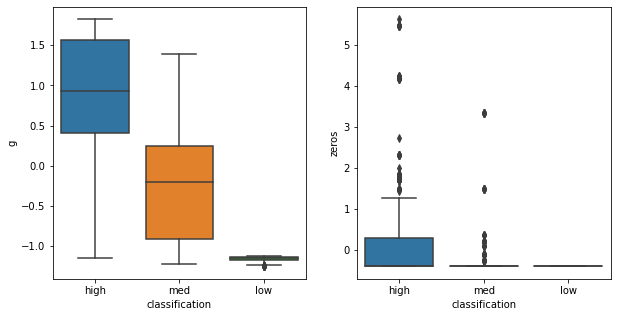

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="classification", y="g", data=df_scaled, ax=axs[0])
sns.boxplot(x="classification", y="zeros", data=df_scaled, ax=axs[1])
fig.savefig('../images/sparsity_features_boxplots.png')

### peaks

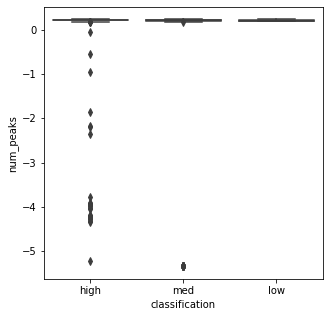

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(x="classification", y="num_peaks", data=df_scaled, ax=ax)
fig.savefig('../images/peaks_boxplots.png')

### gradients

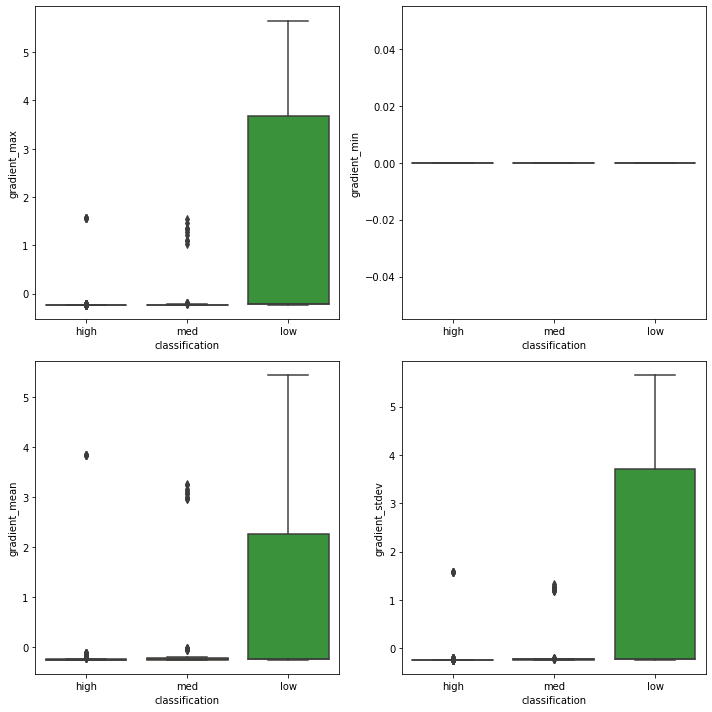

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.boxplot(x="classification", y="gradient_max", data=df_scaled, ax=axs[0][0])
sns.boxplot(x="classification", y="gradient_min", data=df_scaled, ax=axs[0][1])
sns.boxplot(x="classification", y="gradient_mean", data=df_scaled, ax=axs[1][0])
sns.boxplot(x="classification", y="gradient_stdev", data=df_scaled, ax=axs[1][1])
fig.tight_layout()
fig.savefig('../images/gradient_features_boxplots.png')